In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


In [9]:
# Load CSV file
df = pd.read_csv("country_wise_latest.csv")


In [10]:
# Shape of dataset
print("Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data types
print("\nData Types:\n", df.dtypes)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:\n", df.describe())


Shape: (187, 15)

Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']

Data Types:
 Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

Missing Values:
 Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases           

C:\Users\Super\miniconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [11]:
region_group = df.groupby("WHO Region").agg({
    "Confirmed": "sum",
    "Deaths": "sum",
    "Recovered": "sum",
    "Active": "sum",
    "New cases": "sum"
}).sort_values(by="Confirmed", ascending=False)

print("\nAggregated Region Data:\n", region_group)



Aggregated Region Data:
                        Confirmed  Deaths  Recovered   Active  New cases
WHO Region                                                             
Americas                 8839286  342732    4468616  4027938     129531
Europe                   3299523  211144    1993723  1094656      22294
South-East Asia          1835297   41349    1156933   637015      48993
Eastern Mediterranean    1490744   38339    1201400   251005      12410
Africa                    723207   12223     440645   270339      12176
Western Pacific           292428    8249     206770    77409       3289


In [12]:
who_region_counts = df["WHO Region"].value_counts()
print("\nCountries per WHO Region:\n", who_region_counts)



Countries per WHO Region:
 WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64


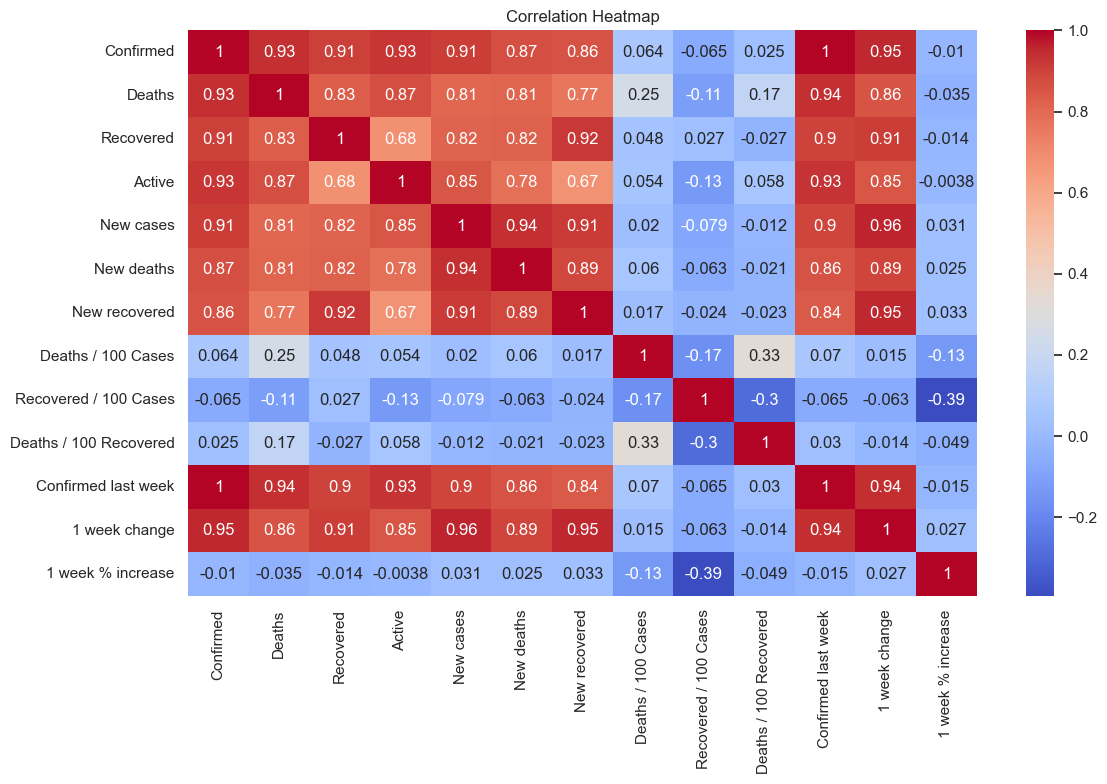

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\Super\AppData\Local\Temp\ipykernel_1444\359169899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_confirmed, x="Confirmed", y="Country/Region", palette="Reds_r")


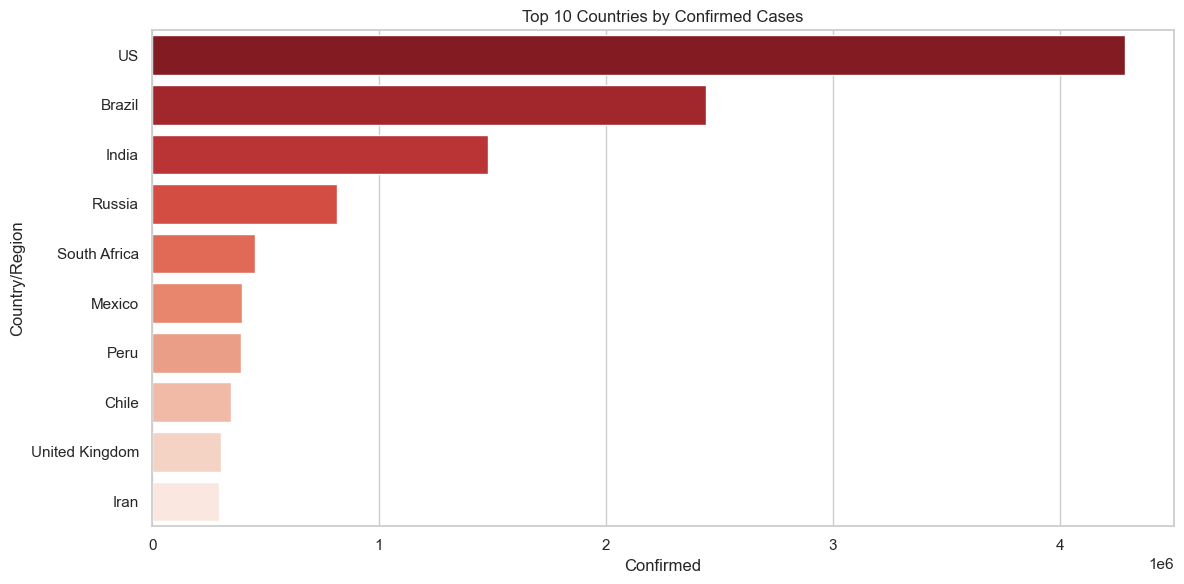

In [14]:
top_confirmed = df.sort_values(by="Confirmed", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_confirmed, x="Confirmed", y="Country/Region", palette="Reds_r")
plt.title("Top 10 Countries by Confirmed Cases")
plt.tight_layout()
plt.show()


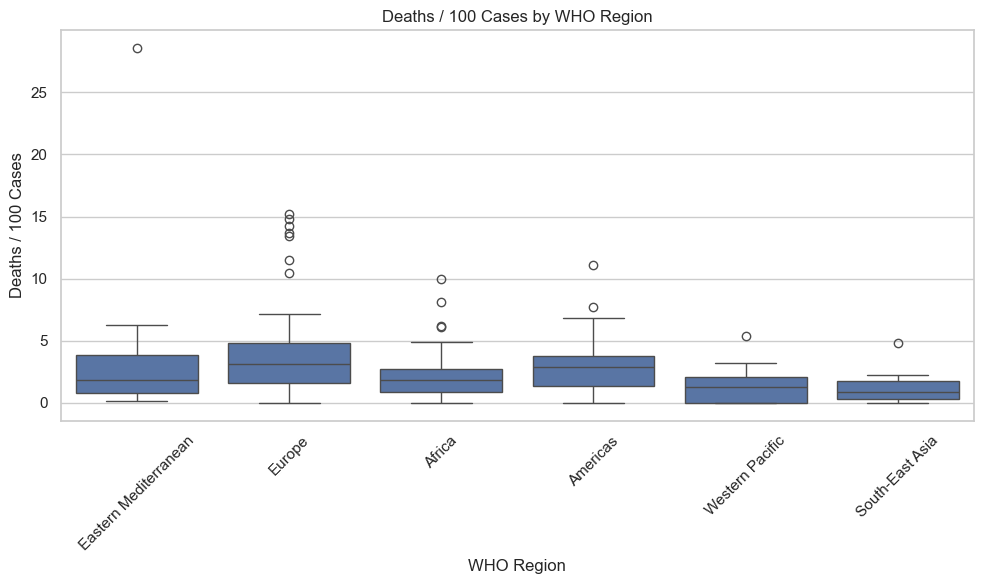

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="WHO Region", y="Deaths / 100 Cases")
plt.title("Deaths / 100 Cases by WHO Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


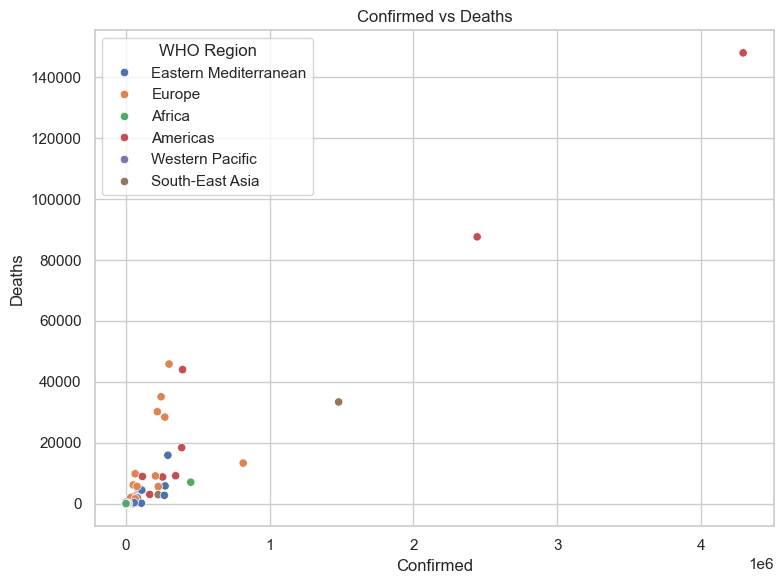

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Confirmed", y="Deaths", hue="WHO Region")
plt.title("Confirmed vs Deaths")
plt.tight_layout()
plt.show()


C:\Users\Super\AppData\Local\Temp\ipykernel_1444\738072980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_group.index, y=region_group["Confirmed"], palette="Blues_d")


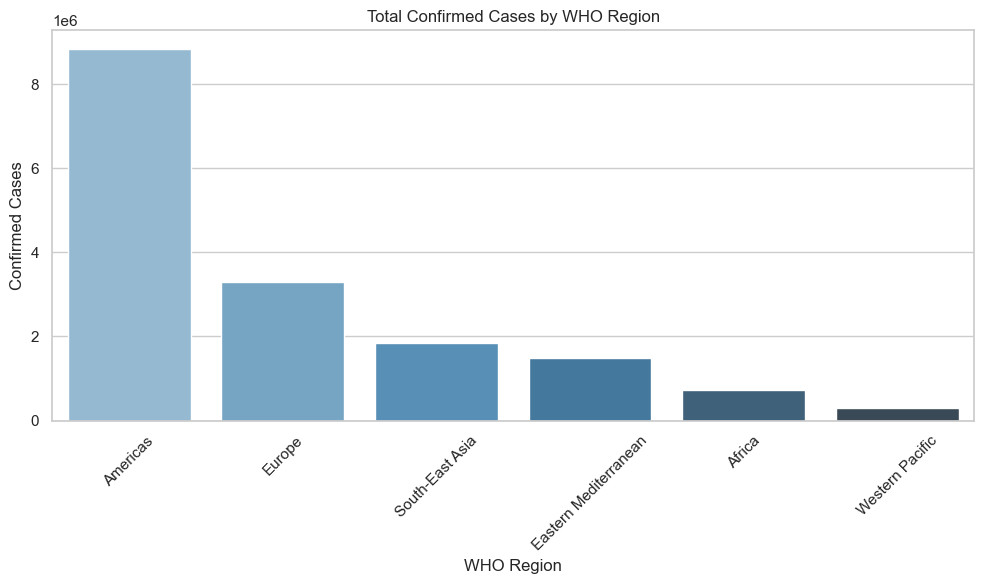

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_group.index, y=region_group["Confirmed"], palette="Blues_d")
plt.title("Total Confirmed Cases by WHO Region")
plt.xticks(rotation=45)
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()


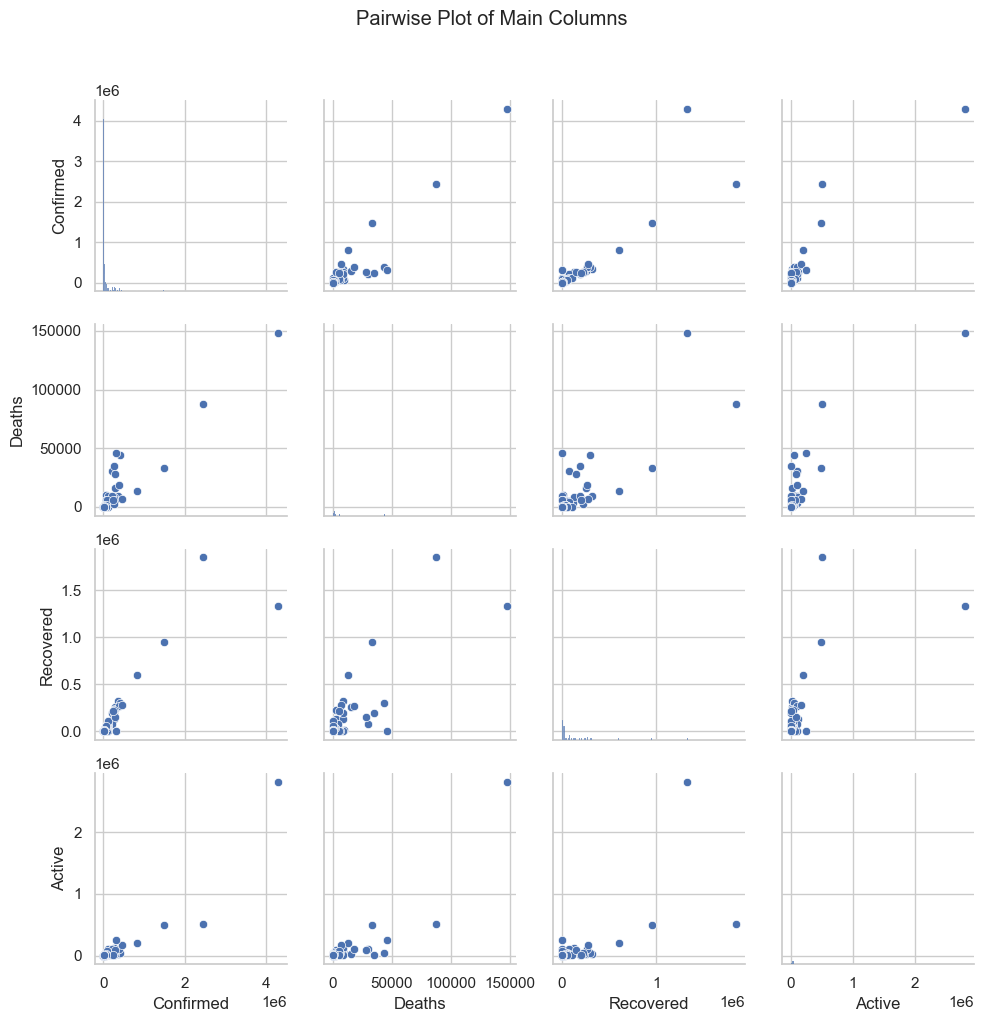

In [18]:
selected_columns = ["Confirmed", "Deaths", "Recovered", "Active"]

sns.pairplot(df[selected_columns])
plt.suptitle("Pairwise Plot of Main Columns", y=1.02)
plt.tight_layout()
plt.show()


C:\Users\Super\AppData\Local\Temp\ipykernel_1444\2600968612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="WHO Region", y="Active", palette="Set2")


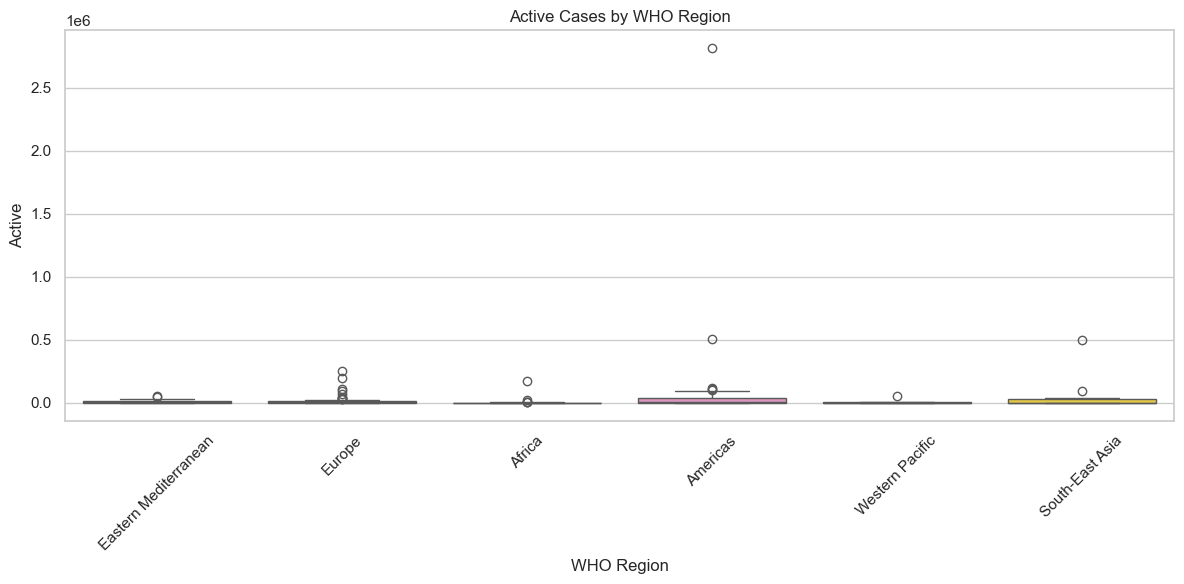

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="WHO Region", y="Active", palette="Set2")
plt.title("Active Cases by WHO Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


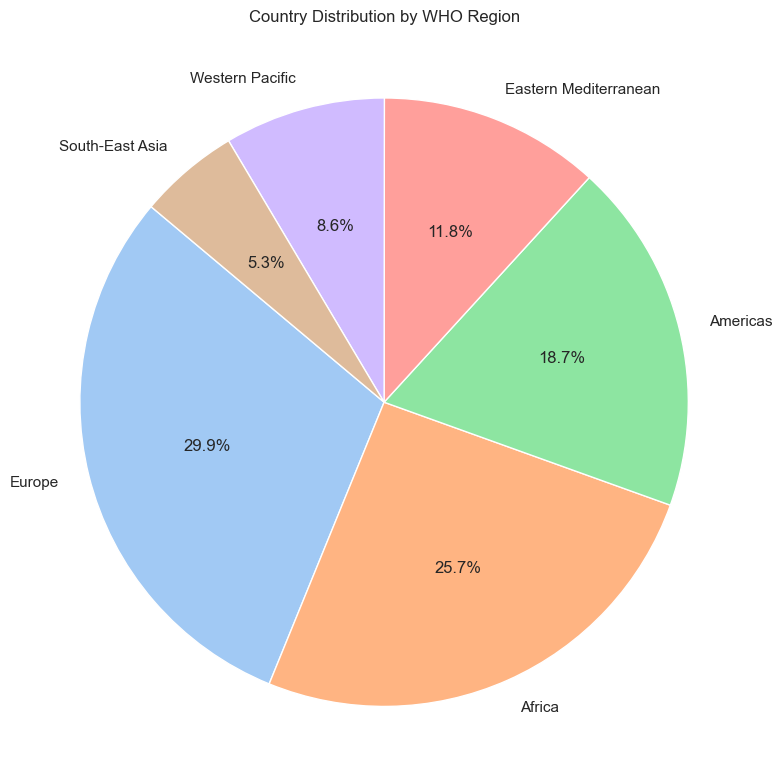

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(who_region_counts, labels=who_region_counts.index, autopct="%1.1f%%",
        startangle=140, colors=sns.color_palette("pastel"))
plt.title("Country Distribution by WHO Region")
plt.axis("equal")
plt.tight_layout()
plt.show()
